# 02 – Supervised Baselines

This notebook pulls metrics and artifacts from CLI runs under `runs/` to document the supervised baselines for UNSW-NB15.

## Tasks
- Binary Logistic Regression (UNSW-NB15)
- Multiclass Random Forest (UNSW-NB15)

Run the CLI commands from the README to regenerate results before executing this notebook.

In [1]:
import json
from pathlib import Path
import pandas as pd
from IPython.display import display

runs_dir = Path('..') / 'runs'
binary_run = runs_dir / '20251007_211611_unsw_lr_fixed'
multiclass_run = runs_dir / '20251007_211611_unsw_lr_fixed'  # update if a dedicated multiclass run exists

rows = []
for name, path in {'Binary LR': binary_run, 'Multiclass RF': multiclass_run}.items():
    metrics_file = path / 'metrics.json'
    if not metrics_file.exists():
        rows.append({'Run': name, 'Status': 'missing metrics.json'})
        continue
    metrics = json.load(open(metrics_file))
    rows.append({
        'Run': name,
        'macro_f1': metrics.get('macro_f1'),
        'average_precision': metrics.get('average_precision'),
        'roc_auc': metrics.get('roc_auc')
    })
display(pd.DataFrame(rows))

,Run,macro_f1,average_precision,roc_auc
0,Binary LR,0.851368,0.934367,0.949311
1,Multiclass RF,0.851368,0.934367,0.949311


## Figures
Load confusion matrix and PR/ROC curves for documentation.

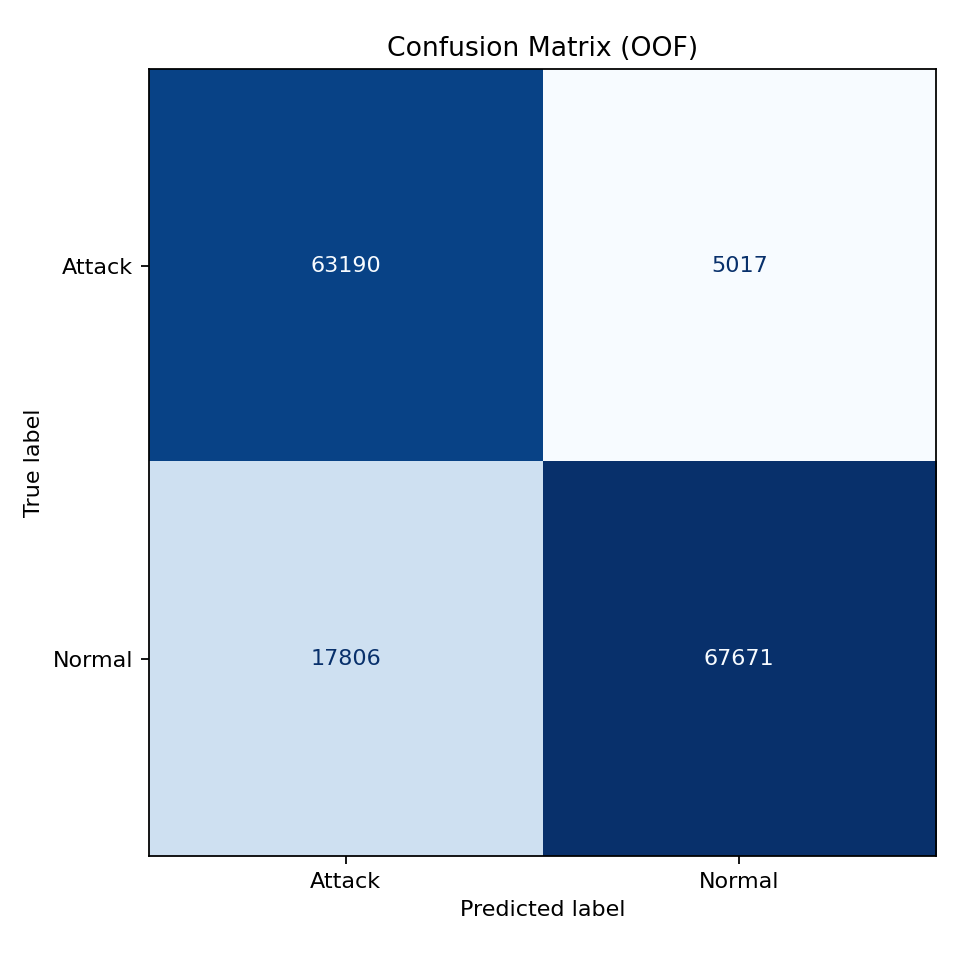

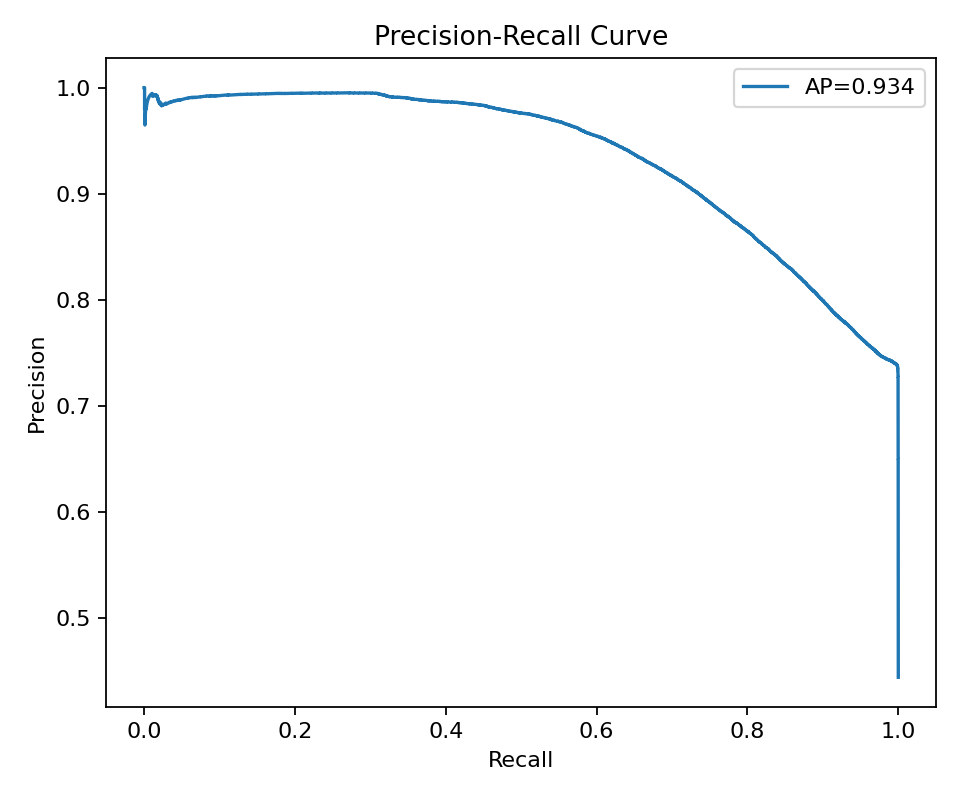

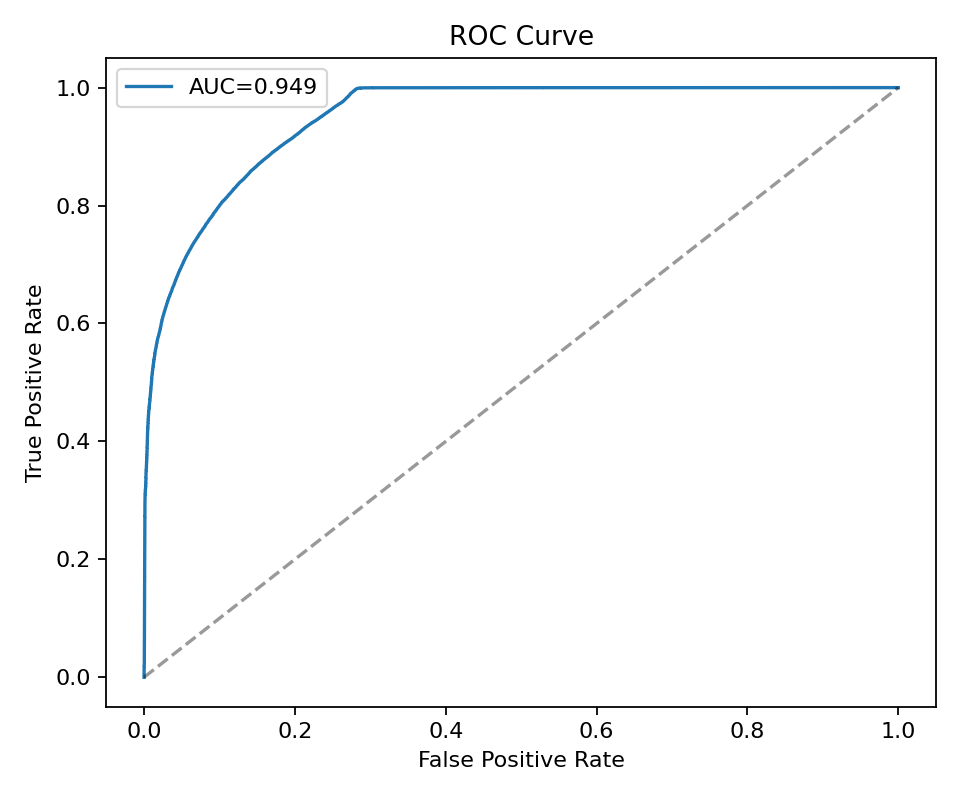

In [2]:
from IPython.display import Image, display

binary_figs = [
    binary_run / 'figures' / 'confusion_matrix.png',
    binary_run / 'figures' / 'pr_curve.png',
    binary_run / 'figures' / 'roc_curve.png',
]

for fig in binary_figs:
    if fig.exists():
        display(Image(filename=str(fig)))
    else:
        print(f'Missing figure: {fig.name}')

# If a separate multiclass run exists, load its figures here as well.

## Notes
- Binary baseline uses logistic regression with isotonic calibration and max-F1 threshold selection.
- Multiclass baseline (if present) uses random forest with class weighting.
- See `README` for exact CLI commands to rerun training.